In [92]:
import torch 
import numpy as np
import torch.nn as nn
import torch.optim as optim 
import torchvision 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


In [93]:
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


Using device: cpu


In [94]:
from torchvision import transforms

# For grayscale Fashion MNIST
transform = transforms.Compose([
    transforms.ToTensor()
    # No need to normalize to RGB since Fashion MNIST is grayscale i did the normalise and it messed up the shape of the images
])

# Apply the transform to your dataset
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)


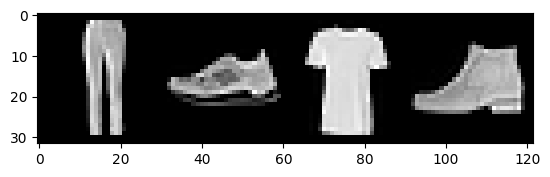

Trouser Sneaker T-shirt/top Ankle boot


In [86]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the transformation
transform = transforms.Compose([transforms.ToTensor()])

# Load the dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

# Check a few images before normalization
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Function to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images before normalization
imshow(torchvision.utils.make_grid(images[:4]))

# Print labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


In [88]:
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28 * 28, 512)
        self.dropout = nn.Dropout(0.3)  # Dropout with 50% probability
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 =nn.Linear (128 , 56)
        self.output_layer = nn.Linear(56, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.layer1(x))
        x = self.dropout(x)  # Apply dropout
        x = F.relu(self.layer2(x))
        x = self.dropout(x)  # Apply dropout
        x = F.relu(self.layer3(x))
        x = self.dropout(x)
        x = F.relu(self.layer4(x))
        x = self.output_layer(x)
        return x


In [89]:
#defining the loss and using the adam optimiser
from torch.optim.lr_scheduler import StepLR
loss=nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)


In [90]:
#training the model
epochs=5
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs=model(images)
        Loss=loss(outputs,labels)
        Loss.backward()
        optimizer.step()

    print( f'Epoch[{epoch+1}/{epochs}], Loss: {Loss.item():4f}')
    

Epoch[1/10], Loss: 0.184064
Epoch[2/10], Loss: 0.108360
Epoch[3/10], Loss: 0.141232
Epoch[4/10], Loss: 0.216150
Epoch[5/10], Loss: 0.217902
Epoch[6/10], Loss: 0.052834
Epoch[7/10], Loss: 0.419921
Epoch[8/10], Loss: 0.191288
Epoch[9/10], Loss: 0.303477
Epoch[10/10], Loss: 0.059844


In [77]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')


Accuracy on the test set: 88.26%


Predicted: Ankle boot, Actual: Ankle boot


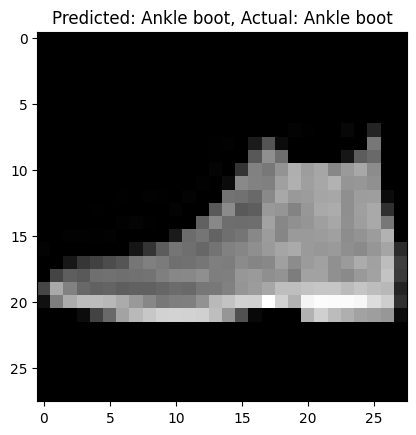

Predicted: Pullover, Actual: Pullover


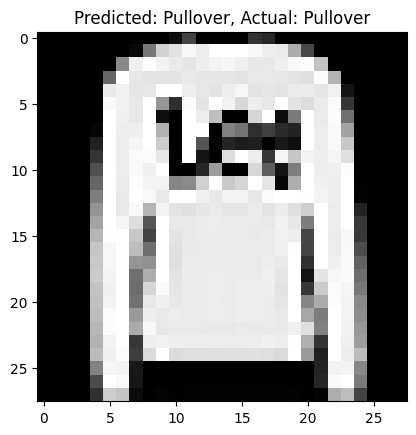

Predicted: Trouser, Actual: Trouser


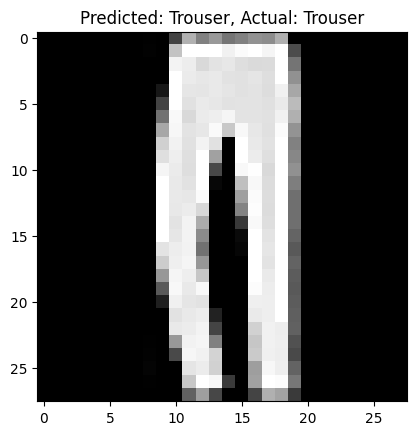

Predicted: Trouser, Actual: Trouser


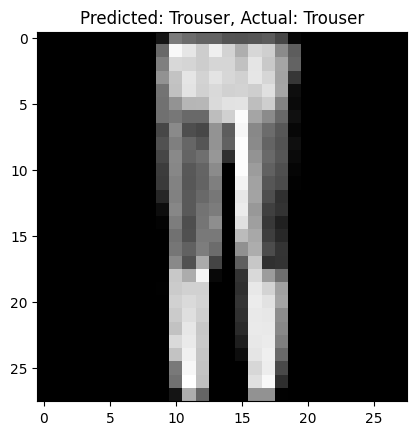

Predicted: Shirt, Actual: Shirt


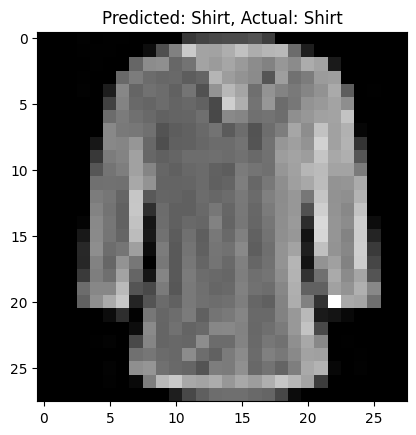

In [58]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

with torch.no_grad():
    n_images = 5
    for i in range(n_images):
        image, label = test_dataset[i]
        output = model(image.unsqueeze(0))
        _, predicted = torch.max(output.data, 1)
        print(f'Predicted: {classes[predicted]}, Actual: {classes[label]}')

        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f'Predicted: {classes[predicted]}, Actual: {classes[label]}')
        plt.show()
